#**Résumé du travail effectué**

Afin de parvenir à la prédiction des postes, j'ai dans un premier temps **uniformisé** la représentation des prénoms dans les 2 datasets. Par la suite, j'ai effectué une **fusion à gauche** sur la colonne prénom des 2 jeux de données et j'ai **appliqué une fonction** qui attribue le genre 'inconnu' au jeu de données fusionné lorsque le prénom dans le jeu de données des salariés de la province d'Ontario n'est pas présent dans le dataset des probabilités du genre de prénoms au USA ou lorsque la probabilité est ambiguë. Aussi, j'ai encodé notre colonne cible 'Poste' par **Label encoding** et j'ai encodé nos entrées catégorielles par **Target Encoding**. Pour la classification , j'ai **proposé une architecture Embedding Neural Network** adaptée à nos données. Cette architecture a fourni une **accuracy de 58%** sur nos données de test. Pour finir , j'ai utilisé le **Perceptron multicouche** pour la classification des postes. Le perceptron a fourni une accuracy de 3% sur nos données de test.

# **Résultats obtenus**
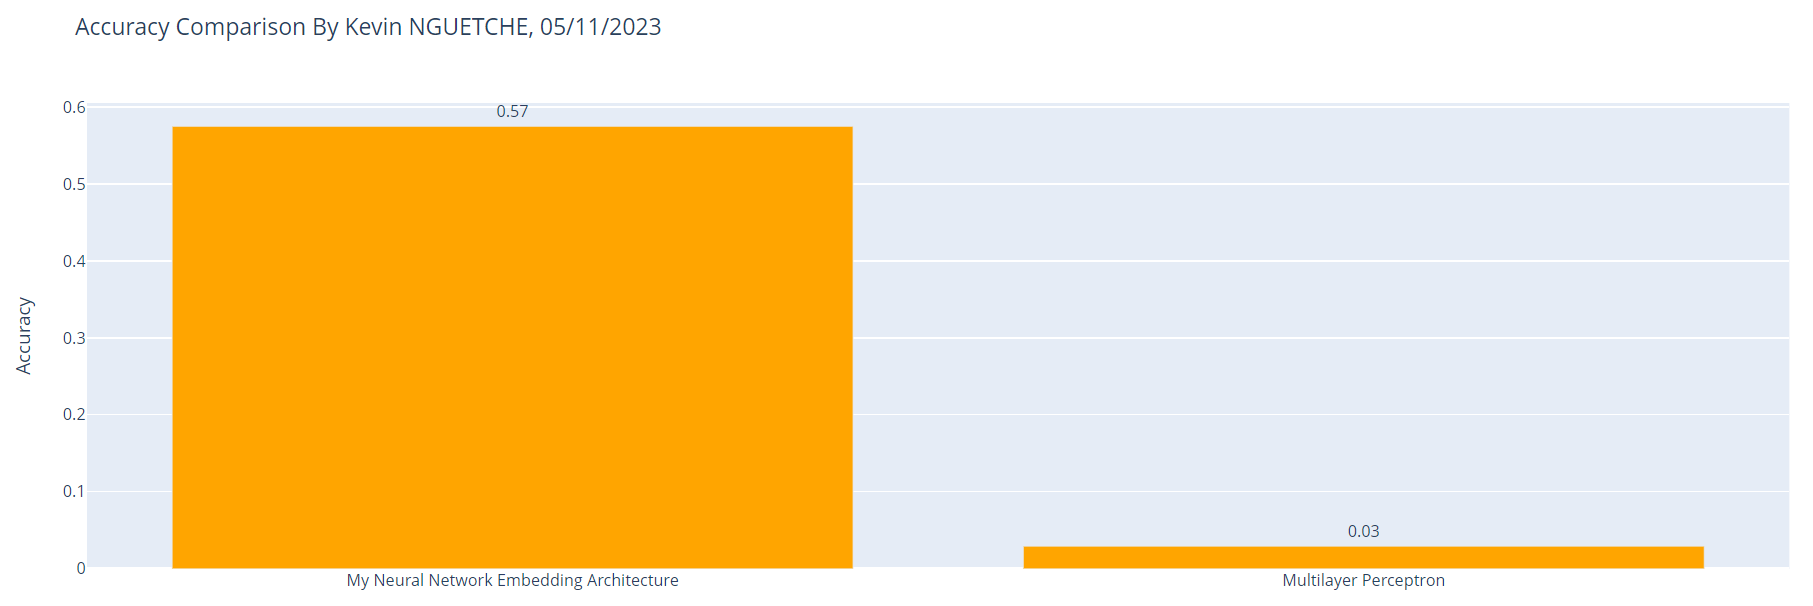
Nous pouvons constater que l'architecture Embedding Neural Network que je propose , surpasse de très loin les performances d'un modèle de perceptron multicouche pour la prédiction du 'Poste' d'un individu à partir des informations sur son 'Prénom' , son 'Sex' et le 'Traitement versé'. Mes choix d'encodage des données catégorielles (Label Encoding, Target Encoding) ont une forte influence sur les performances de nos modèles.   

#**Difficultés rencontrées**

La prémière difficulté que j'ai rencontré a été, au niveau des choix des encodages des données catégorielles, adaptées à nos modèles de prédiction. En effet, le **One Hot Encoding** et le **Ordinal Encoding** n'ont pas été adaptés à notre contexte en raison du très grand nombre de dimensions qu'elles génèrent. En effet, ces dimensions créees par conséquent des matrices creuses.

La Deuxième difficulté rencontrée a été liée au fait de constater, que les modèles classiques de Machine Learning sont inefficaces dans notre contexte quelque soit les 4 encodeurs utilisés : **Target Encoding** , **Label Encoding** , **One Hot Encoding** et **Ordinal Encoding**. Il s'agit des modèles : **XGBoost** , **Random Forest** , **Linear Regression**.


#**Perspectives**

Comme perspective pour la classification des postes, nous pouvons **adapter nos données** et utiliser des algorithmes de type **Bag of words** , **FastText** ou même **BERT**.

#**I. Prise en main des datasets**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

def getData() :
  data1 = pd.read_csv("./drive/MyDrive/Petit_test/fr-2017-pssd-compendium-20180320-utf8.csv")
  data2 =  pd.read_csv("./drive/MyDrive/Petit_test/us-likelihood-of-gender-by-name-in-2014.csv")
  employee = data1.copy()
  gender = data2.copy()
  return employee , gender

employee_data , gender_data = getData()



**1.   Dataset employee**



In [ ]:
employee_data.head(6)

,Secteur,Nom de famille,Prénom,Traitement versé,Avantages imposables,Employeur,Poste,Année civile
0,Autres employeurs du secteur public,Coleridge,Peter,"$250,000.00","$25,749.50",Big Brothers Big Sisters of Canada,National President and Chief Executive Officer,2017
1,Autres employeurs du secteur public,Chater,W. Matthew,"$100,877.00","$2,778.27",Big Brothers Big Sisters of Canada,"National Vice-President, Service and Organizat...",2017
2,Autres employeurs du secteur public,Mcintyre,Mary Ellen,"$113,847.58","$19,015.00",Centre For Spanish Speaking Peoples,Legal Director,2017
3,Autres employeurs du secteur public,Marlin,Susan,"$248,068.75",$258.48,Clinical Trials Ontario,President and Chief Executive Officer,2017
4,Autres employeurs du secteur public,Frampton,Peter,"$165,033.85","$10,788.30",Learning Enrichment Foundation,Executive Director,2017
5,Autres employeurs du secteur public,Sullivan,Therese,"$129,784.54","$1,125.16",Learning Enrichment Foundation,Vice President Finance,2017


In [ ]:
employee_data.shape

(131741, 8)

In [ ]:
print("Statistiques des données catégorielles du dataset employee\n")
employee_stats = employee_data.describe(include=['object'])
print(employee_stats)

Statistiques des données catégorielles du dataset employee

                          Secteur Nom de famille   Prénom Traitement versé  \
count                      131741         131741   131741           131741   
unique                         18          49604    25350           113139   
top     Municipalités et services          Smith  Michael      $101,974.84   
freq                        40796            726     2375              750   

       Avantages imposables                 Employeur      Poste  
count                131741                    131741     131741  
unique                42845                      1775      29215  
top                   $0.00  Ontario Power Generation  Constable  
freq                   8683                      7878       4037  




**2.   Dataset gender**



In [ ]:
gender_data.head(6)

,sex,name,gender.prob
0,F,Elaine,1.0
1,F,Cathy,1.0
2,F,Heidi,1.0
3,F,Vicki,1.0
4,F,Melinda,1.0
5,F,Roberta,1.0


In [ ]:
gender_data.shape

(11316, 3)

In [ ]:
print("Statistiques des données catégorielles du dataset gender\n")
gender_stats = gender_data.describe(include=['object'])
print(gender_stats)

Statistiques des données catégorielles du dataset gender

          sex    name
count   11316   11316
unique      2   11316
top         F  Elaine
freq     6880       1


#**II. Prétraitement et fusion des 2 datasets**

In [ ]:
print("Elimination des caractères indésirables")
employee_data['Traitement versé'] = employee_data['Traitement versé'].replace( '[\$,]','', regex=True )
employee_data['Avantages imposables'] = employee_data['Avantages imposables'].replace( '[\$,]','', regex=True )

Elimination des caractères indésirables


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
print("Uniformisation des caractères des colonnes 'Prénom' et 'name'")
employee_data['Prénom'] = employee_data['Prénom'].apply(lambda n : unidecode(n))
gender_data['name'] = gender_data['name'].apply(lambda n : unidecode(n))

Uniformisation des caractères des colonnes 'Prénom' et 'name'




**1.   Jointure à gauche des 2 datasets**



In [ ]:
employeeWithGender_data = employee_data.merge(gender_data, left_on='Prénom', right_on='name', how='left')



**2.   Fonction d'inférence du sexe pour le dataset employee**



In [ ]:
def assign_gender(row):
    if pd.isna(row['sex']):
        return 'UNKNOWN'
    elif row['gender.prob'] <= 0.5:
        return 'UNKNOWN'
    else:
        return row['sex']

employeeWithGender_data['sex'] = employeeWithGender_data.apply(assign_gender, axis=1)

In [ ]:
employeeWithGender_data['sex'].head(6)

0          M
1    UNKNOWN
2    UNKNOWN
3          F
4          M
5          F
Name: sex, dtype: object

In [ ]:
print("Nouvelles statistiques sur le sexe\n")
employeeWithGenderSex_stats = employeeWithGender_data['sex'].describe(include=['object'])
print(employeeWithGenderSex_stats)

Nouvelles statistiques sur le sexe

count     131741
unique         3
top            M
freq       58417
Name: sex, dtype: object


In [ ]:
employeeWithGender_data.head(2)

,Secteur,Nom de famille,Prénom,Traitement versé,Avantages imposables,Employeur,Poste,Année civile,sex,name,gender.prob
0,Autres employeurs du secteur public,Coleridge,Peter,250000.00,25749.50,Big Brothers Big Sisters of Canada,National President and Chief Executive Officer,2017,M,Peter,0.999235
1,Autres employeurs du secteur public,Chater,W. Matthew,100877.00,2778.27,Big Brothers Big Sisters of Canada,"National Vice-President, Service and Organizat...",2017,UNKNOWN,NaN,NaN


In [ ]:
employeeWithGender_stats = employeeWithGender_data.describe(include=['object'])
print(employeeWithGender_stats)

                          Secteur Nom de famille   Prénom Traitement versé  \
count                      131741         131741   131741           131741   
unique                         18          49604    25277           113139   
top     Municipalités et services          Smith  Michael        101974.84   
freq                        40796            726     2375              750   

       Avantages imposables                 Employeur      Poste     sex  \
count                131741                    131741     131741  131741   
unique                42845                      1775      29215       3   
top                    0.00  Ontario Power Generation  Constable       M   
freq                   8683                      7878       4037   58417   

           name  
count    101732  
unique     4107  
top     Michael  
freq       2375  




**3.   Encodage de la colonne cible 'Poste' : Label Encoding**



In [ ]:
from sklearn.preprocessing import LabelEncoder


def encodagePoste(data) :
  label_encoder = LabelEncoder()
  y_encodé = label_encoder.fit_transform(data)
  return y_encodé

y = encodagePoste(employeeWithGender_data['Poste'])
print(" 'Poste' encodé -> y.shape :", y.shape )

 'Poste' encodé -> y.shape : (131741,)


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00



**4.   Encodage de nos entrées : Target Encoding**


In [ ]:
from category_encoders import TargetEncoder


def encoderEntrees(data, label) :
  target_encoder = TargetEncoder()
  dataEncodé = target_encoder.fit_transform(data , label)
  return dataEncodé , target_encoder

X , target_encoder = encoderEntrees(employeeWithGender_data[['Traitement versé', 'sex', 'Prénom']], y)
print(" data['Traitement versé', 'sex', 'Prénom'] encodé -> X.shape :", X.shape )

 data['Traitement versé', 'sex', 'Prénom'] encodé -> X.shape : (131741, 3)




**5.   Division des données en données de test et d'entrainnement**



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print("X_train.shape " , X_train.shape)
print("X_test.shape " , X_test.shape)
print("y_train.shape " , y_train.shape)
print("y_test.shape " , y_test.shape)

X_train.shape  (105392, 3)
X_test.shape  (26349, 3)
y_train.shape  (105392,)
y_test.shape  (26349,)


#**III. L'architecture Embedding Neural Network que je propose pour prédire le 'Poste'**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report

model = keras.Sequential([
    keras.layers.Input(shape=(3,)),  # Couche d'entrée avec 3 dimensions
    keras.layers.Embedding(input_dim=len(employeeWithGender_data['Poste'].unique()), output_dim=16),  # Couche d'incorporation pour les caractéristiques catégorielles
    keras.layers.Flatten(),  # Aplatir les données
    keras.layers.Dense(128, activation='relu'),  # Couche cachée
    keras.layers.Dropout(0.5),  # Couche de régularisation par dropout
    keras.layers.Dense(len(employeeWithGender_data['Poste'].unique()), activation='softmax')          # Couche de sortie pour la classification multiclasse
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 16)             467440    
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 29215)             3768735   
                                                                 
Total params: 4242447 (16.18 MB)
Trainable params: 4242447 (16.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("Compilation du modèle")
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Compilation du modèle


In [ ]:
# Entraînez le modèle
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

Epoch 1/50
1483/1483 [==============================] - 36s 20ms/step - loss: 6.7171 - accuracy: 0.1756 - val_loss: 5.7086 - val_accuracy: 0.3511
Epoch 2/50
1483/1483 [==============================] - 25s 17ms/step - loss: 5.2368 - accuracy: 0.3940 - val_loss: 5.1505 - val_accuracy: 0.4482
Epoch 3/50
1483/1483 [==============================] - 25s 17ms/step - loss: 4.6833 - accuracy: 0.4596 - val_loss: 4.9239 - val_accuracy: 0.4923
Epoch 4/50
1483/1483 [==============================] - 24s 16ms/step - loss: 4.3049 - accuracy: 0.4944 - val_loss: 4.8090 - val_accuracy: 0.5191
Epoch 5/50
1483/1483 [==============================] - 25s 17ms/step - loss: 3.9793 - accuracy: 0.5188 - val_loss: 4.7262 - val_accuracy: 0.5382
Epoch 6/50
1483/1483 [==============================] - 25s 17ms/step - loss: 3.6893 - accuracy: 0.5382 - val_loss: 4.6600 - val_accuracy: 0.5504
Epoch 7/50
1483/1483 [==============================] - 25s 17ms/step - loss: 3.4416 - accuracy: 0.5517 - val_loss: 4.6100 -

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Les différentes probabilités
y_pred = model.predict(X_test)

824/824 [==============================] - 4s 5ms/step


In [ ]:
print("Les probabilités associées à chaque classe :" , y_pred)

Les probabilités associées à chaque classe : [[1.39098314e-12 5.06009845e-10 2.35175839e-15 ... 5.58453163e-16
  5.95146808e-22 8.07005662e-09]
 [6.25505513e-29 4.17250400e-23 9.57554907e-37 ... 0.00000000e+00
  0.00000000e+00 4.70014246e-14]
 [1.12403930e-29 8.83294557e-25 2.60112273e-32 ... 1.43483697e-27
  3.31153382e-36 7.49968476e-10]
 ...
 [1.99304332e-12 9.62201985e-10 5.01708701e-13 ... 1.01368971e-24
  1.27671733e-21 4.55668436e-09]
 [5.08008271e-37 4.40542692e-22 4.87090293e-27 ... 1.06825374e-35
  1.18807752e-36 1.35540433e-14]
 [5.22950922e-24 4.90478257e-14 9.74810951e-26 ... 6.91336876e-18
  5.98265808e-14 4.84829998e-09]]


In [ ]:
y_pred_classes = y_pred.argmax(axis=-1)
print("Les différentes classes :" , y_pred_classes)

Les différentes classes : [22727 25648  4646 ... 23792 28884  5212]




**1.   L' accuracy du modèle Embedding NN que je propose**


In [ ]:
accuracy_emb_nn = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy de notre Embedded Neural Network : {accuracy_emb_nn*100:.2f}%")

Accuracy de notre Embedded Neural Network : 57.49%


In [ ]:
print("Rapport de classification :")
print(classification_report(y_test, y_pred_classes))

Rapport de classification :


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.50      0.33      0.40         9
           3       0.60      0.14      0.23        21
           4       0.57      0.94      0.71        35
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         1
          39       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.



**2.   Prédiction du poste pour n'importe quelle entrée donnée**



In [ ]:
# Prédiction du Poste pour n'importe quelle entrée

traitement = '129784.54'
sex = 'F'
prénom = 'Therese'

input_data = pd.DataFrame({'Traitement versé': [traitement], 'sex': [sex], 'Prénom': [prénom]})

input_data_encoded = target_encoder.transform(input_data)

y_pred = model.predict(input_data_encoded)

predicted_class = y_pred.argmax(axis=-1)
predicted_probability = max(y_pred[0])


print(f'Poste prédit (encodé) : {predicted_class}')
print(f'Probabilité associée au poste : {predicted_probability}')

1/1 [==============================] - 0s 26ms/step
Poste prédit (encodé) : [28294]
Probabilité associée au poste : 0.9934740662574768


#**IV. Multilayer Perceptron pour prédire le poste**

In [ ]:
# MLP

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report

# Créez un modèle MLP amélioré
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Couche de régularisation par dropout
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(employeeWithGender_data['Poste'].unique()), activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 29215)             1898975   
                                                                 
Total params: 1915807 (7.31 MB)
Trainable params: 1915807 (7.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("Compilation du modèle")
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Compilation du modèle


In [ ]:
# Entraînez le modèle
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
2965/2965 [==============================] - 41s 13ms/step - loss: 9.9206 - accuracy: 0.0266 - val_loss: 8.0413 - val_accuracy: 0.0311
Epoch 2/50
2965/2965 [==============================] - 41s 14ms/step - loss: 7.6596 - accuracy: 0.0290 - val_loss: 8.2034 - val_accuracy: 0.0307
Epoch 3/50
2965/2965 [==============================] - 41s 14ms/step - loss: 7.5634 - accuracy: 0.0310 - val_loss: 8.4341 - val_accuracy: 0.0307
Epoch 4/50
2965/2965 [==============================] - 39s 13ms/step - loss: 7.5389 - accuracy: 0.0308 - val_loss: 8.6076 - val_accuracy: 0.0307
Epoch 5/50
2965/2965 [==============================] - 40s 14ms/step - loss: 7.5284 - accuracy: 0.0310 - val_loss: 8.7217 - val_accuracy: 0.0307
Epoch 6/50
2965/2965 [==============================] - 40s 14ms/step - loss: 7.5415 - accuracy: 0.0309 - val_loss: 8.7923 - val_accuracy: 0.0307
Epoch 7/50
2965/2965 [==============================] - 39s 13ms/step - loss: 7.5197 - accuracy: 0.0307 - val_loss: 8.8322 -

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Évaluez le modèle
y_pred = model2.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

824/824 [==============================] - 1s 2ms/step




**1.   L' accuracy du Multilayer Perceptron utilisé pour la prédiction du 'Poste'**



In [ ]:
accuracy_mlp = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy of multilayer Perceptron : {accuracy_mlp*100:.2f}%")

Accuracy of multilayer Perceptron : 2.93%


In [ ]:
# Affichez un rapport de classification pour obtenir plus de détails sur les performances
print("Rapport de classification :")
print(classification_report(y_test, y_pred_classes))

Rapport de classification :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        35
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**V. Comparaison des performances de l'architecture Embedding NN que je propose et du Multilayer Perceptron pour la prédiction du 'Poste'**

In [ ]:
# Schéma de comparaison
import numpy as np
import plotly.graph_objects as go


def comparaisonVisuele(accuracy_embedding , accuracy_perceptron) :
  # Comparaison de nos modèles
  acc_combine = {'Model':  ['My Neural Network Embedding Architecture', 'Multilayer Perceptron'],
          'Accuracy_Test': [accuracy_embedding, accuracy_perceptron]
          }
  fig = go.Figure(data=[
      go.Bar(name='Test set', x=acc_combine['Model'], y=acc_combine['Accuracy_Test'],text=np.round(acc_combine['Accuracy_Test'],2),textposition='outside', marker_color='orange')
  ])

  fig.update_layout(barmode='group',title_text='Accuracy Comparison By Kevin NGUETCHE, 05/11/2023',yaxis=dict(
          title='Accuracy'))
  fig.show()


comparaisonVisuele(accuracy_emb_nn, accuracy_mlp)